In [36]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import os
import json

In [ ]:
BASE_PATH_TO_DATA = "/media/chris/M2"
TRUST_ANNOTATIONS = f"{BASE_PATH_TO_DATA}/1-Raw_Data/Trust Annotations"
TURN_ANNOTATIONS = f"{BASE_PATH_TO_DATA}/2-Processed_Data/Annotation-Turns"
SURVEYS = f"{BASE_PATH_TO_DATA}/1-Raw_Data/Survey/"

mapping_survey = {
    "The black spot": "right",
    "The gray checkered spot": "center",
    "The white spot": "left",
}
mapping_annotation = {
    "Black Spot": "right",
    "Gray Spot": "center",
    "White Spot": "left",
}


In [31]:
def find_files(filePath, file_key= ".mp4"):
    sessions = {}
    for folder in os.listdir(filePath):
        newPath = os.path.join(filePath,folder)
        if (os.path.isdir(newPath)):
            for fileName in os.listdir(newPath):
                if file_key in fileName:
                    sessions[folder] = os.path.join(newPath,fileName)
    return sessions

def find_trust_annotations(filePath, file_key= ".mp4"):
    key = {}
    for folder in os.listdir(filePath):
        newPath = os.path.join(filePath,folder)
        if (os.path.isdir(newPath)):
            for fileName in os.listdir(newPath):
                if file_key in fileName:
                    key[fileName[:4]] = os.path.join(newPath,fileName)
    return key



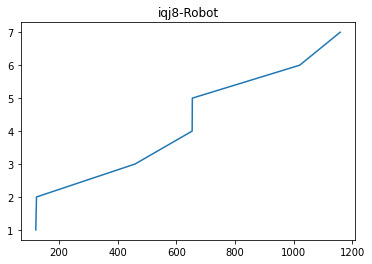

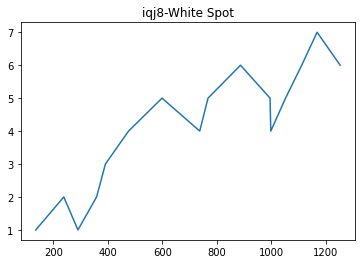

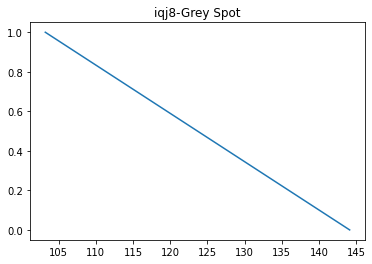

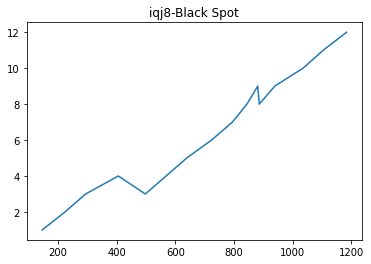

In [68]:
people = find_trust_annotations(TRUST_ANNOTATIONS, ".json")
for k, person in people.items():
    with open(person) as f:
        data = json.load(f)
        for s, l in data.items():
            t = []
            p = []
            # Sort here
            l = sorted(l, key=lambda k: k['time']) 
            for keypress in l:
                if keypress["time"] != 0:
                    t.append(keypress["time"])
                    p.append(keypress["points"])
            fig = plt.Figure(figsize=(20,18))
            score = 0
            p2 = []
            for i in p:
                score += i
                p2.append(score)
            plt.plot(t,p2)
            plt.title(f"{k}-{s}")
            plt.show()
        break

In [29]:
scored_people  = pd.read_csv(f"{SURVEYS}/scored_surveys.csv")
# display(scored_people)